In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)

data_path = "all_data_engineered.csv"

df = pd.read_csv(data_path)
print(df.shape)
df.head()

(20845, 34)


,contracting_authority,reference_number,procurement_object,procedure_type,contract_type,framework_agreement_type,limit_fund,publication_date,opening_date,closing_date,is_canceled,cancellation_reason,is_suspended,winner_name,winner_nipt,winner_value,winner_value_at_contract_signing,contract_signed_with_vat,num_bids_submitted,num_bids_qualified,cpv_codes,fund_usage,value_changed_at_contract_signing,is_single_bidder,is_single_qualified_bid,tender_duration_days,is_over_budget,company_total_wins,company_total_value,company_avg_fund_usage,company_total_single_bid_wins,company_total_canceled_wins,company_single_bid_win_rate,company_cancellation_rate
0,Bashkia Patos,REF-58813-08-22-2025,Shërbim për licensimin e paketës microsoft off...,Small Value,Services,NaN,500000.00,2025-08-22,2025-08-22,2025-08-26,Jo,NaN,Jo,VODAFONE ALBANIA,K11715005L,314000.0,NaN,Jo,16,7,72267100-0 Mirëmbajtja e softwareve të teknol...,0.628000,NaN,False,False,4.0,False,18.0,10847908.00,0.856723,0.0,0.0,0.000000,0.000000
1,Universiteti i Mjekesise Tirane,REF-45062-04-15-2025,Blerje produkte të dizenjuara dhe printuara pë...,Small Value,Supplies,NaN,583333.33,2025-04-15,2025-04-15,2025-04-16,Jo,NaN,Jo,UNIQUE AWARDS,M47009701K,489000.0,NaN,Jo,15,13,"22100000-1 Libra të shtypur, broshura dhe fle...",0.838286,NaN,False,False,1.0,False,7.0,2644000.00,0.879583,0.0,0.0,0.000000,0.000000
2,Qendra Shendetesore Maliq,REF-44157-04-08-2025,Blerje Reagente per Laboratorin Klinik-Biokimik,Small Value,Supplies,NaN,120000.00,2025-04-08,2025-04-08,2025-04-09,Jo,NaN,Jo,KRIJON,K12023001A,108000.0,NaN,Jo,2,2,33696500-0 Reagentë për laborator,0.900000,NaN,False,False,1.0,False,23.0,45096256.25,0.849149,5.0,4.0,0.217391,0.173913
3,Operatori i Blerjeve te Perqendruara,REF-42930-03-28-2025,"Riparim dhe mirëmbajtje automjetesh, ndarë në ...",Open INT,Services,Marreveshje Kuader me disa Operatore Ekonomik,20962408.00,2025-04-01,2025-04-01,2025-05-02,Jo,NaN,Jo,NaN,UNKNOWN,0.0,NaN,Jo,0,0,50112110-7 Shërbime riparimi për automjete,0.000000,NaN,False,False,31.0,False,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000
4,Komisioni Qendror i Zgjedhjeve,REF-64907-10-14-2025,Prodhim shenja identiteti (bexhe pvc) dhe etik...,Negotiated without Notice,Supplies,NaN,4275683.00,2025-10-14,2025-10-14,2025-10-17,Po,në procedurat me një fazë nuk është dorëzuar a...,Jo,NaN,UNKNOWN,0.0,NaN,Jo,1,0,22455000-4 Karta identiteti,0.000000,NaN,True,False,3.0,False,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000


In [2]:
# Notebook 1: Quick sanity check on key columns

key_cols = [
    "winner_nipt",
    "fund_usage",
    "value_changed_at_contract_signing",
    "is_single_bidder",
    "is_single_qualified_bid",
    "num_bids_qualified",
    "company_total_wins",
    "company_total_value",
    "company_avg_fund_usage",
    "company_total_single_bid_wins",
    "company_total_canceled_wins",
    "company_single_bid_win_rate",
    "company_cancellation_rate",
]

missing = [c for c in key_cols if c not in df.columns]
print("Missing columns:", missing)

df[key_cols].describe(include="all")


Missing columns: []


,winner_nipt,fund_usage,value_changed_at_contract_signing,is_single_bidder,is_single_qualified_bid,num_bids_qualified,company_total_wins,company_total_value,company_avg_fund_usage,company_total_single_bid_wins,company_total_canceled_wins,company_single_bid_win_rate,company_cancellation_rate
count,20845,16950.000000,1.677000e+03,20845,20845,20845.000000,20845.000000,2.084500e+04,20845.000000,20845.000000,20845.000000,20845.000000,20845.000000
unique,2261,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UNKNOWN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4078,NaN,NaN,18369,16745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.656866,4.512858e+06,NaN,NaN,6.202159,74.698537,3.301209e+07,0.619065,4.398465,4.581243,0.089566,0.072391
std,NaN,0.360165,2.341125e+07,NaN,NaN,7.535339,151.663769,8.029633e+07,0.361732,18.998208,8.285498,0.234571,0.131029
min,NaN,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.502503,2.798400e+05,NaN,NaN,1.000000,2.000000,2.400000e+05,0.580245,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.799855,6.863219e+05,NaN,NaN,3.000000,16.000000,9.572200e+06,0.794923,0.000000,1.000000,0.000000,0.017341
75%,NaN,0.948791,1.959400e+06,NaN,NaN,8.000000,59.000000,3.062660e+07,0.865610,1.000000,5.000000,0.015692,0.081967


In [ ]:
# Notebook 2: Helper – safe min-max normalization

def minmax_series(s: pd.Series) -> pd.Series:
    s = s.astype(float)
    s_min = s.min()
    s_max = s.max()
    if pd.isna(s_min) or pd.isna(s_max) or s_max == s_min:
        return pd.Series(0.0, index=s.index)
    return (s - s_min) / (s_max - s_min)

df["company_total_wins_norm"] = minmax_series(df["company_total_wins"])
df["num_bids_qualified_norm"] = minmax_series(df["num_bids_qualified"])

df[["company_total_wins", "company_total_wins_norm",
    "num_bids_qualified", "num_bids_qualified_norm"]].head()


,company_total_wins,company_total_wins_norm,num_bids_qualified,num_bids_qualified_norm
0,18.0,0.025678,7,0.118644
1,7.0,0.009986,13,0.220339
2,23.0,0.032810,2,0.033898
3,0.0,0.000000,0,0.000000
4,0.0,0.000000,0,0.000000


In [ ]:
# Notebook 3: create interpretable risk components

for col in [
    "is_single_bidder",
    "is_single_qualified_bid",
    "fund_usage",
    "is_over_budget",
    "value_changed_at_contract_signing",
    "company_single_bid_win_rate",
    "company_cancellation_rate",
]:
    if col in df.columns:
        df[col] = df[col].astype(float)

# 1. Competition Risk
df["competition_risk"] = (
    0.40 * df["is_single_bidder"] +
    0.25 * df["is_single_qualified_bid"] +
    0.20 * df["company_single_bid_win_rate"] +
    0.10 * (1 - df["company_total_wins_norm"]) +
    0.05 * (1 - df["num_bids_qualified_norm"])
)

df["competition_risk"] = df["competition_risk"].clip(0, 1)


# 2. Budget Risk

# ensure float type
for col in ["fund_usage", "is_over_budget", "value_changed_at_contract_signing"]:
    df[col] = df[col].astype(float)

# whether value changed at contract signing
df["value_changed_flag"] = (df["value_changed_at_contract_signing"] != 0).astype(float)

df["budget_risk"] = (
    0.50 * df["fund_usage"] +
    0.35 * df["is_over_budget"] +
    0.15 * df["value_changed_flag"]
)
df["budget_risk"] = df["budget_risk"].clip(0, 1)

df["budget_risk"].describe()


# 3. Historical Risk
df["historical_risk"] = (
    0.55 * df["company_cancellation_rate"] +
    0.45 * df["company_single_bid_win_rate"]
)

df["historical_risk"] = df["historical_risk"].clip(0, 1)

df[["competition_risk", "budget_risk", "historical_risk"]].describe()


,competition_risk,budget_risk,historical_risk
count,20845.000000,16950.000000,20845.000000
mean,0.248686,0.487023,0.080120
std,0.247057,0.197112,0.119376
min,0.044664,0.000338,0.000000
25%,0.133999,0.401153,0.000000
50%,0.145763,0.547445,0.025000
75%,0.172197,0.623400,0.104054
max,0.999010,1.000000,1.000000


In [ ]:
# %%
# Notebook 4: logistic scaling and top-level composite risk score

competition_weight = 0.45
budget_weight      = 0.35
historical_weight  = 0.20

df["risk_composite_linear"] = (
    competition_weight * df["competition_risk"] +
    budget_weight      * df["budget_risk"] +
    historical_weight  * df["historical_risk"]
)

# logistic scaling
alpha = 5.0 
center = 0.5 

z = alpha * (df["risk_composite_linear"] - center)
df["risk_score"] = 1 / (1 + np.exp(-z))

df[["risk_composite_linear", "risk_score"]].describe()


,risk_composite_linear,risk_score
count,16950.000000,16950.000000
mean,0.312312,0.296855
std,0.153124,0.161742
min,0.069148,0.103934
25%,0.227451,0.203794
50%,0.278002,0.247873
75%,0.365039,0.337422
max,0.879486,0.869600


In [ ]:
# Notebook 5: Risk Level（Low / Medium / High）

def classify_risk(score: float) -> str:
    if pd.isna(score):
        return "Unknown"
    if score < 0.33:
        return "Low"
    elif score < 0.66:
        return "Medium"
    else:
        return "High"


df["risk_level"] = df["risk_score"].apply(classify_risk)

df["risk_level"].value_counts(dropna=False)


Low        12657
Unknown     3895
Medium      3201
High        1092
Name: risk_level, dtype: int64

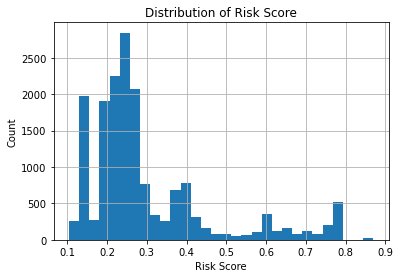

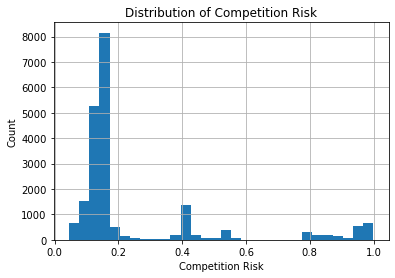

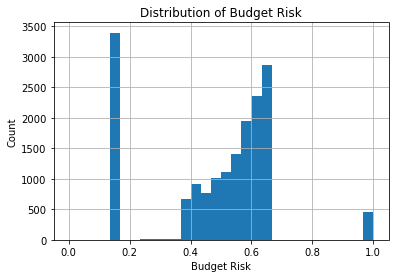

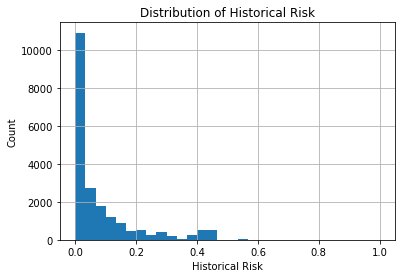

In [ ]:
# Notebook 6: visualization to check distributions

plt.figure()
df["risk_score"].hist(bins=30)
plt.title("Distribution of Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.show()

plt.figure()
df["competition_risk"].hist(bins=30)
plt.title("Distribution of Competition Risk")
plt.xlabel("Competition Risk")
plt.ylabel("Count")
plt.show()

plt.figure()
df["budget_risk"].hist(bins=30)
plt.title("Distribution of Budget Risk")
plt.xlabel("Budget Risk")
plt.ylabel("Count")
plt.show()

plt.figure()
df["historical_risk"].hist(bins=30)
plt.title("Distribution of Historical Risk")
plt.xlabel("Historical Risk")
plt.ylabel("Count")
plt.show()


In [ ]:
# Notebook 7: check some high-risk examples for case studies

cols_to_show = [
    "contracting_authority",
    "reference_number",
    "procurement_object",
    "fund_usage",
    "is_single_bidder",
    "is_single_qualified_bid",
    "num_bids_qualified",
    "company_total_wins",
    "company_single_bid_win_rate",
    "company_cancellation_rate",
    "competition_risk",
    "budget_risk",
    "historical_risk",
    "risk_score",
    "risk_level",
]

high_risk_examples = (
    df[df["risk_level"] == "High"]
    .sort_values("risk_score", ascending=False)
    .head(10)[cols_to_show]
)

high_risk_examples


,contracting_authority,reference_number,procurement_object,fund_usage,is_single_bidder,is_single_qualified_bid,num_bids_qualified,company_total_wins,company_single_bid_win_rate,company_cancellation_rate,competition_risk,budget_risk,historical_risk,risk_score,risk_level
1223,Inspektorati Shteteror i Mbikeqyrjes se Tregut,REF-40439-03-07-2025,Pajisje me siguracion mjeti,1.000000,1.0,1.0,1,54.0,0.962963,0.000000,0.984042,1.000000,0.433333,0.869600,High
395,Drejtoria Vendore e Policise Diber,REF-60916-09-10-2025,Shpenzime Siguracionesh mjetesh sipas nevojes ...,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.867804,High
15967,Inspektorati Larte Deklarimit dhe Kontrollit P...,REF-39844-03-04-2025,Sherbim per sigurimin vjetor te automjeteve,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.867804,High
18212,Ndermarrja e Sherbimeve Publike Sarande,REF-44958-04-14-2025,Shpenzime për siguracionin e mjeteve të trans...,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.867804,High
6209,ILLYRIAN GUARD SH.A,REF-50179-06-04-2025,Shpenzimet e siguracionit te mjeteve te transp...,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.867804,High
14792,Agjencia Kombëtare e Pyjeve,REF-43167-04-02-2025,Blerje siguracion (TPL) per automjetet,1.000000,1.0,1.0,1,93.0,0.946237,0.021505,0.975133,1.000000,0.437634,0.867804,High
9043,Qendra Kombetare e Biznesit,REF-62525-09-24-2025,Program trajnimi për stafin e asistencës të QKB,0.969388,1.0,1.0,1,1.0,1.000000,1.000000,0.999010,0.634694,1.000000,0.865120,High
15674,Bashkia Kucove,REF-55810-07-22-2025,"“Blerje siguracion automjeti”,",1.000000,1.0,1.0,1,59.0,0.881356,0.033898,0.967007,1.000000,0.415254,0.863069,High
19875,Drejtoria Rajonale e Kufirit dhe Migracionit D...,REF-60071-09-02-2025,Shpenzime për sigurimin e automjeteve,1.000000,1.0,1.0,1,174.0,0.919540,0.000000,0.958239,1.000000,0.413793,0.860546,High
20257,Drejtoria e SHISH-it Tiranë,REF-38366-02-18-2025,Shpenzime per blerje siguracioni TPL per mjete...,1.000000,1.0,1.0,1,174.0,0.919540,0.000000,0.958239,1.000000,0.413793,0.860546,High


In [ ]:
# Notebook 8: export complete dataset with risk scores for later LLM experiments

output_path = "all_data_with_risk_scores.csv"
df.to_csv(output_path, index=False)
print("Saved:", output_path)


Saved: all_data_with_risk_scores.csv


In [ ]:
# Notebook 9: export text summary for LLM prompt

def build_case_summary(row: pd.Series) -> str:
    return (
        f"Contracting authority: {row['contracting_authority']}. "
        f"Procurement object: {row['procurement_object']}. "
        f"Contract type: {row['contract_type']}. "
        f"Fund usage (winner_value / limit_fund) is {row['fund_usage']:.2f}. "
        f"There were {int(row['num_bids_qualified'])} qualified bids "
        f"and single bidder flag is {int(row['is_single_bidder'])}. "
        f"The company has won {int(row['company_total_wins'])} contracts in 2025, "
        f"with a single-bid win rate of {row['company_single_bid_win_rate']:.2f} "
        f"and cancellation rate of {row['company_cancellation_rate']:.2f}."
    )

df["llm_summary"] = df.apply(build_case_summary, axis=1)

df[["llm_summary", "risk_level"]].head()


,llm_summary,risk_level
0,Contracting authority: Bashkia Patos. Procurem...,Low
1,Contracting authority: Universiteti i Mjekesis...,Low
2,Contracting authority: Qendra Shendetesore Mal...,Low
3,Contracting authority: Operatori i Blerjeve te...,Low
4,Contracting authority: Komisioni Qendror i Zgj...,Low


In [ ]:
# %% 10: sample subset for LLM evaluation

import numpy as np

print(df["risk_level"].value_counts(dropna=False))

# sample N_PER_LEVEL from each risk level
N_PER_LEVEL = 10  

eval_samples = []

for level in ["Low", "Medium", "High"]:
    subset = df[df["risk_level"] == level]
    if len(subset) == 0:
        continue
    n_sample = min(N_PER_LEVEL, len(subset))
    eval_samples.append(
        subset.sample(n_sample, random_state=42)
    )

eval_df = pd.concat(eval_samples).reset_index(drop=True)
print(eval_df["risk_level"].value_counts())

# only keep necessary columns for LLM evaluation
cols_for_llm = [
    "reference_number",
    "contracting_authority",
    "procurement_object",
    "contract_type",
    "fund_usage",
    "is_single_bidder",
    "is_single_qualified_bid",
    "num_bids_qualified",
    "company_total_wins",
    "company_single_bid_win_rate",
    "company_cancellation_rate",
    "competition_risk",
    "budget_risk",
    "historical_risk",
    "risk_score",
    "risk_level",
    "llm_summary",  # text summary for LLM prompt
]

eval_df = eval_df[cols_for_llm]

eval_output_path = "eval_subset_for_llm.csv"
eval_df.to_csv(eval_output_path, index=False)
print("Saved eval subset to:", eval_output_path)

eval_df.head()


Low        12657
Unknown     3895
Medium      3201
High        1092
Name: risk_level, dtype: int64
Low       10
Medium    10
High      10
Name: risk_level, dtype: int64
Saved eval subset to: eval_subset_for_llm.csv


,reference_number,contracting_authority,procurement_object,contract_type,fund_usage,is_single_bidder,is_single_qualified_bid,num_bids_qualified,company_total_wins,company_single_bid_win_rate,company_cancellation_rate,competition_risk,budget_risk,historical_risk,risk_score,risk_level,llm_summary
0,REF-40202-03-05-2025,Qendra Spitalore Universitare Nene Tereza Tirane,Loti 74 Sistemi kardiovaskular Amiodarone 150...,Supplies,0.000000,0.0,0.0,0,0.0,0.0,0.000000,0.150000,0.150000,0.000000,0.130108,Low,Contracting authority: Qendra Spitalore Univer...
1,REF-57866-08-12-2025,Bashkia Maliq,Përmirësimi i banesave ekzistuese për komunite...,Works,0.686504,0.0,0.0,3,8.0,0.0,0.000000,0.146316,0.493252,0.000000,0.212889,Low,Contracting authority: Bashkia Maliq. Procurem...
2,REF-39805-03-03-2025,Bashkia Tepelene,F.v dyer e dritare zyrat e oraganiaztave te v...,Works,0.844500,0.0,0.0,20,18.0,0.0,0.055556,0.130483,0.572250,0.030556,0.236057,Low,Contracting authority: Bashkia Tepelene. Procu...
3,REF-45311-04-16-2025,Ndermarrja e Sherbimeve Publike Korce,Vaj lubrifikante,Supplies,0.715817,0.0,0.0,5,18.0,0.0,0.000000,0.143195,0.507909,0.000000,0.216027,Low,Contracting authority: Ndermarrja e Sherbimeve...
4,REF-53921-07-08-2025,Bashkia Gramsh,Kolaudimin e punimeve per objektin: “Rikonstru...,Services,0.834596,0.0,0.0,6,8.0,0.0,0.000000,0.143774,0.567298,0.000000,0.234381,Low,Contracting authority: Bashkia Gramsh. Procure...


In [ ]:
# 11: design LLM prompt template

USER_PROMPT_TEMPLATE = """You are an expert auditor evaluating public procurement cases for corruption risk.
Your task is to read the case summary and classify the risk as Low, Medium, or High.
Focus on competition (single bidders, low competition), budget behavior (over budget, close to limit), and historical behavior of the company.
Be conservative but not overly pessimistic: High risk should be reserved for clearly concerning patterns.

Here is a summary of a procurement case:

{summary}

Please answer with:
1. A single label: Low, Medium, or High (for corruption / integrity risk).
2. A brief explanation (2-4 sentences) explaining why you chose this label.

Format your answer as:
Label: <Low/Medium/High>
Explanation: <text>
"""

print(USER_PROMPT_TEMPLATE.format(summary="(example) " + eval_df.iloc[0]["llm_summary"]))


You are an expert auditor evaluating public procurement cases for corruption risk.
Your task is to read the case summary and classify the risk as Low, Medium, or High.
Focus on competition (single bidders, low competition), budget behavior (over budget, close to limit), and historical behavior of the company.
Be conservative but not overly pessimistic: High risk should be reserved for clearly concerning patterns.

Here is a summary of a procurement case:

(example) Contracting authority: Qendra Spitalore Universitare Nene Tereza Tirane. Procurement object: Loti 74 Sistemi kardiovaskular  Amiodarone 150 mg /3ml-3ml  Ampule. Contract type: Supplies. Fund usage (winner_value / limit_fund) is 0.00. There were 0 qualified bids and single bidder flag is 0. The company has won 0 contracts in 2025, with a single-bid win rate of 0.00 and cancellation rate of 0.00.

Please answer with:
1. A single label: Low, Medium, or High (for corruption / integrity risk).
2. A brief explanation (2-4 sentence

In [ ]:
# %% 12: run LLM calls

from tqdm.notebook import tqdm

llm_raw_responses = []
llm_raw_explanations = []

for _, row in tqdm(eval_df.iterrows(), total=len(eval_df), desc="LLM calls"):
    user_prompt = USER_PROMPT_TEMPLATE.format(summary=row["llm_summary"])
    try:
        # use existing `client` (do NOT re-create or expose API keys here)
        response = client.responses.create(model="gpt-5", input=user_prompt)
        # try common access patterns for the new API
        text = getattr(response, "output_text", None)
        if text is None:
            try:
                text = response.output[0].content[0].text  # fallback
            except Exception:
                text = str(response)
    except Exception as e:
        text = f"__ERROR__ {e}"

    llm_raw_responses.append(text)
    llm_raw_explanations.append(text)  # placeholder; you can parse/extract explanation later

eval_df["llm_raw_response"] = llm_raw_responses
eval_df["llm_raw_explanation"] = llm_raw_explanations

eval_df.to_csv("eval_with_llm_raw.csv", index=False)
print("Saved eval_with_llm_raw.csv")


LLM calls:   0%|          | 0/30 [00:00<?, ?it/s]

Saved eval_with_llm_raw.csv


In [ ]:
# %% 13: parse LLM output, split Label and Explanation

# if you have already run the API calls and saved to eval_with_llm_raw.csv, read it here

try:
    eval_llm = pd.read_csv("eval_with_llm_raw.csv")
except FileNotFoundError:
    eval_llm = eval_df.copy()
    if "llm_raw_response" not in eval_llm.columns:
        print("No llm_raw_response column yet. Fill this after running LLM calls.")

def parse_label_and_explanation(text: str):
    """
    We expect the text to be in the format:
    Label: High
    Explanation: xxx
    """
    if not isinstance(text, str):
        return None, None

    lower = text.lower()
    label = None
    if "low" in lower:
        label = "Low"
    if "medium" in lower:
        label = "Medium"
    if "high" in lower:
        label = "High"

    expl = text
    if "Explanation:" in text:
        expl = text.split("Explanation:", 1)[1].strip()

    return label, expl

eval_llm["llm_label"], eval_llm["llm_explanation"] = zip(
    *eval_llm.get("llm_raw_response", "").apply(parse_label_and_explanation)
)

eval_llm[["llm_raw_response", "llm_label", "llm_explanation"]].head()


,llm_raw_response,llm_label,llm_explanation
0,Label: Low\nExplanation: The data suggests the...,Low,The data suggests there was no awarded contrac...
1,Label: Low\nExplanation: The tender had health...,Low,The tender had healthy competition with 3 qual...
2,Label: Low\nExplanation: This tender shows str...,Low,This tender shows strong competition with 20 q...
3,Label: Low\nExplanation: The tender attracted ...,Low,The tender attracted 5 qualified bids and was ...
4,Label: Low\nExplanation: The tender had health...,Low,The tender had healthy competition with six qu...


In [ ]:
# %% 14: agreement rate + confusion matrix + Spearman correlation

from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import spearmanr

# filter out invalid/missing labels
mask_valid = eval_llm["llm_label"].isin(["Low", "Medium", "High"])
eval_clean = eval_llm[mask_valid].copy()

print("Valid rows:", len(eval_clean), " / ", len(eval_llm))

y_true = eval_clean["risk_level"]
y_pred = eval_clean["llm_label"]

print("== Confusion Matrix ==")
print(confusion_matrix(y_true, y_pred, labels=["Low", "Medium", "High"]))

print("\n== Classification Report (LLM vs Rule Model) ==")
print(classification_report(y_true, y_pred, labels=["Low", "Medium", "High"]))

# Spearman correlation
label_to_score = {"Low": 0, "Medium": 1, "High": 2}
true_score = y_true.map(label_to_score)
pred_score = y_pred.map(label_to_score)

rho, pval = spearmanr(true_score, pred_score)
print(f"\nSpearman correlation between rule risk_level and LLM label: rho={rho:.3f}, p={pval:.3g}")


Valid rows: 30  /  30
== Confusion Matrix ==
[[10  0  0]
 [ 3  4  3]
 [ 0  0 10]]

== Classification Report (LLM vs Rule Model) ==
              precision    recall  f1-score   support

         Low       0.77      1.00      0.87        10
      Medium       1.00      0.40      0.57        10
        High       0.77      1.00      0.87        10

    accuracy                           0.80        30
   macro avg       0.85      0.80      0.77        30
weighted avg       0.85      0.80      0.77        30


Spearman correlation between rule risk_level and LLM label: rho=0.877, p=2.05e-10
